In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns

#### Data Loading

In [2]:
df = pd.read_csv("../zuu crew scores.csv")
df = df[df['CourseName'] == 'Foundations of ML']
df["Passed"] = df["CapstoneScore"] > 75
del df['MemberName'], df['CourseName'], df['CapstoneScore']
df.head()

,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,Passed
0,3,79.9,43.7,2,0,62.8,5.0,False
1,2,76.8,95.6,6,0,87.4,2.7,True
2,3,96.6,75.9,8,0,98.4,2.8,False
4,2,83.2,24.0,6,0,41.8,4.2,False
7,3,86.5,88.0,5,0,23.9,1.3,False


In [3]:
Y = df['Passed'].values
X = df.drop(columns=['Passed'])

#### Model Train

In [4]:
logr = LogisticRegression(max_iter=1000)
logr.fit(X,Y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [ ]:
#make predcition with trained model
Y_hat = logr.predict(X)
Y_hat

array([False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False,  True,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False, False, False])

In [ ]:
# getting probaility values
Y_proba = logr.predict_proba(X)
Y_proba = Y_proba[:,1]
Y_proba

array([8.18477962e-08, 9.77451361e-01, 1.42060776e-01, 7.94602198e-12,
       4.09917767e-01, 9.65419587e-01, 3.11328419e-10, 2.10362494e-05,
       2.33857609e-08, 9.35715193e-09, 1.12689074e-04, 6.21983773e-12,
       5.55728468e-11, 9.74636718e-07, 8.95013500e-06, 9.42984964e-14,
       9.99384461e-01, 1.21000702e-13, 4.05285157e-08, 9.29327263e-01,
       3.82732034e-04, 1.70786037e-10, 4.22860333e-12, 9.60763987e-01,
       9.57946550e-01, 1.33870900e-10, 5.79120170e-10, 4.11198720e-10,
       1.80497439e-07, 3.98388307e-11, 9.92476980e-01, 2.27127907e-10,
       9.76572327e-14, 5.71996481e-04, 6.88177326e-03, 5.18080809e-03,
       4.71646288e-13, 7.34011511e-10, 5.49212786e-12, 5.77402507e-04,
       1.58682897e-04, 1.10638530e-02, 3.85661775e-05, 7.29050325e-02,
       6.64620927e-07, 2.50739539e-06, 2.49525232e-07, 1.12414019e-11,
       1.11641350e-04, 3.19610839e-11, 3.71448770e-01, 2.05457461e-10,
       1.55532996e-07, 9.39585028e-01, 8.27793153e-04, 9.54004213e-01,
      

#### Evaluation Matrices

In [7]:
def compute_confusion_matrix(Y,Y_hat):
    TP = np.sum((Y == 1) & (Y_hat == 1))
    FP = np.sum((Y == 0) & (Y_hat == 1))
    TN = np.sum((Y == 0) & (Y_hat == 0))
    FN = np.sum((Y == 1) & (Y_hat == 0))
    return np.array([
                [TN,FP]
                ,[FN,TP]
                ],
                dtype=int
                )

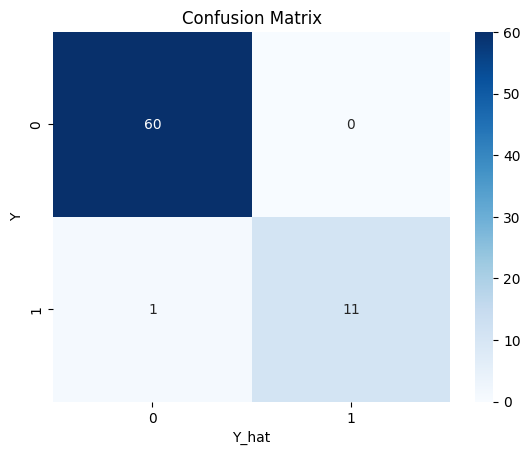

In [8]:
cm = compute_confusion_matrix(Y,Y_hat)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Y_hat')
plt.ylabel('Y')
plt.title('Confusion Matrix')
plt.show()

In [9]:
def precision_score(cm):
    TP = cm[1,1]
    FP = cm[0,1]
    return TP/(TP+FP)

def recall_score(cm):
    TP = cm[1,1]
    FN = cm[1,0]
    return TP / (TP +FN)

def f1_score(cm):
    p = precision_score(cm)
    r = recall_score(cm)
    return 2 * p * r / (p + r)

def accuracy(cm):
    TP = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    TN = cm[0,0]
    return (TP + TN) / (TP + TN + FP + FN)

In [10]:
cm = compute_confusion_matrix(Y, Y_hat) 
p = precision_score(cm)
r = recall_score(cm) 
f1 = f1_score(cm)
acc = accuracy(cm)

print(f"Precision : {p}")
print(f"Recall : {r}")
print(f"F1 Score : {f1}")
print(f"Accuracy : {acc}")

Precision : 1.0
Recall : 0.9166666666666666
F1 Score : 0.9565217391304348
Accuracy : 0.9861111111111112


#### computing ROC curve

In [11]:
def roc_curve(Y,Y_proba):
    thresholds = np.linspace(1,0,200)

    tpr_list = []
    fpr_list = []

    for t in thresholds:
        y_hat = (Y_proba >= t).astype(int)
        
        TP = np.sum((Y == 1) & (y_hat == 1))
        FP = np.sum((Y == 0) & (y_hat == 1))
        TN = np.sum((Y == 0) & (y_hat == 0))
        FN = np.sum((Y == 1) & (y_hat == 0))

        tpr = TP / (TP + FN)
        fpr = FP / (FP + TN)
        
        tpr_list.append(tpr)
        fpr_list.append(fpr)

    return np.array(tpr_list), np.array(fpr_list), np.array(thresholds)



In [12]:
tpr, fpr, _ = roc_curve(Y, Y_proba)

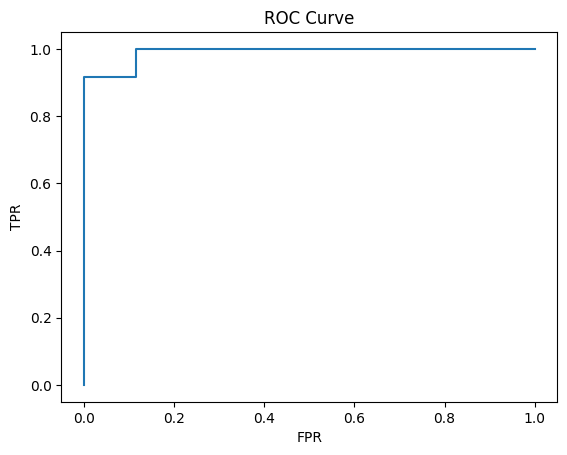

In [13]:
plt.plot(fpr, tpr, label='LogReg')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()

In [ ]:
#getting value of AUC
auc = np.trapezoid(tpr, fpr)
print(f"AUC: {auc}")

AUC: 0.9902777777777778
